# **Setup**

In [1]:
print('Installing torchquantum...')
!git clone -b isca https://github.com/mit-han-lab/torchquantum.git
%cd /content/torchquantum
!pip install --editable . 1>/dev/null
!pip install matplotlib==3.1.3 1>/dev/null
%matplotlib inline
print('All required packages have been successfully installed!')

Installing torchquantum...
Cloning into 'torchquantum'...
remote: Enumerating objects: 11836, done.
remote: Counting objects: 100% (726/726), done.
remote: Compressing objects: 100% (306/306), done.
remote: Total 11836 (delta 435), reused 685 (delta 405), pack-reused 11110
Receiving objects: 100% (11836/11836), 33.59 MiB | 25.33 MiB/s, done.
Resolving deltas: 100% (6593/6593), done.
/content/torchquantum
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchquantum 0.1.2 requires matplotlib>=3.3.2, but you have matplotlib 3.1.3 which is incompatible.
All required packages have been successfully installed!


In [1]:
import torchquantum as tq
import torchquantum.functional as tqf
import numpy as np
import matplotlib.pyplot as plt
import torch

# **1. TorchQuantum basic operations**

## 1.2 TorchQuantum Operations

tq.QuantumDevice Usage

Method 1 of using quantum gates through torchquantum.functional

In [2]:
q_dev = tq.QuantumDevice(n_wires=1, bsz=1)
print(f"all zero state: {q_dev}")
tqf.h(q_dev, wires=0)
print(f"after h gate: {q_dev}")

tqf.rx(q_dev, wires=0, params=[0.3])

print(f"after rx gate: {q_dev}")

all zero state:  class: QuantumDevice 
 device name: default 
 number of qubits: 1 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: [[1.+0.j 0.+0.j]]
after h gate:  class: QuantumDevice 
 device name: default 
 number of qubits: 1 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: [[0.70710677+0.j 0.70710677+0.j]]
after rx gate:  class: QuantumDevice 
 device name: default 
 number of qubits: 1 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: [[0.6991667-0.10566872j 0.6991667-0.10566872j]]


all zero state:  class: QuantumDevice 
 device name: default 
 number of qubits: 3 
 batch size: 1 
 current computing device: cpu 
 recording op history: True 
 current states: [[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]
after h gate:  class: QuantumDevice 
 device name: default 
 number of qubits: 3 
 batch size: 1 
 current computing device: cpu 
 recording op history: True 
 current states: [[0.70710677+0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.70710677+0.j 0.        +0.j 0.        +0.j 0.        +0.j]]
after rx gate:  class: QuantumDevice 
 device name: default 
 number of qubits: 3 
 batch size: 1 
 current computing device: cpu 
 recording op history: True 
 current states: [[0.6991667-0.10566872j 0.       +0.j         0.       +0.j
  0.       +0.j         0.6991667-0.10566872j 0.       +0.j
  0.       +0.j         0.       +0.j        ]]


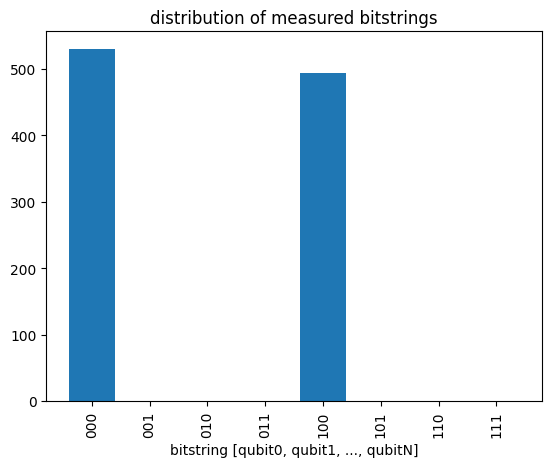

[OrderedDict([('000', 530), ('001', 0), ('010', 0), ('011', 0), ('100', 494), ('101', 0), ('110', 0), ('111', 0)])]


In [7]:
# method 2 of using tq.Operator
q_dev.reset_states(bsz=1)
print(f"all zero state: {q_dev}")

h_gate = tq.H()
h_gate(q_dev, wires=0)

print(f"after h gate: {q_dev}")

rx_gate = tq.RX(has_params=True, init_params=[0.3])

rx_gate(q_dev, wires=0)

print(f"after rx gate: {q_dev}")
bitstring = tq.measure(q_dev, n_shots=1024, draw_id=0)

print(bitstring)

 class: QuantumDevice 
 device name: default 
 number of qubits: 2 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: [[0.70710677+0.j 0.        +0.j 0.        +0.j 0.70710677+0.j]]


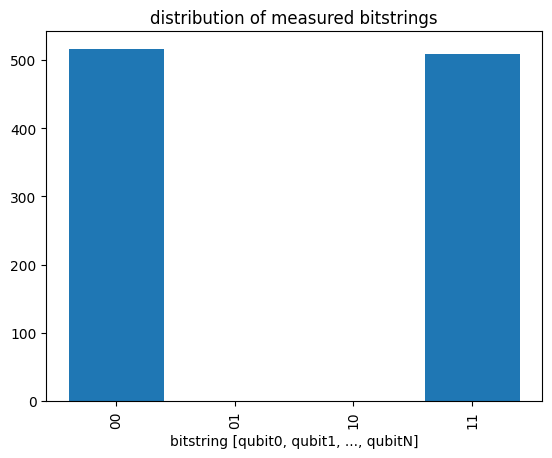

[OrderedDict([('00', 516), ('01', 0), ('10', 0), ('11', 508)])]


In [8]:
# prepare a EPR pair

q_dev = tq.QuantumDevice(n_wires=2)
q_dev.h(wires=0)
q_dev.cnot(wires=[0, 1])

print(q_dev)
bitstring = tq.measure(q_dev, n_shots=1024, draw_id=0)
print(bitstring)


In [9]:
# obtain the expval on a observable by stochastic sampling (doable on simulator and real quantum hardware)
from torchquantum.measure import expval_joint_sampling
expval_sampling = expval_joint_sampling(q_dev, 'ZX', n_shots=1024)
print(expval_sampling)

# obtain the expval on a observable by analytical computation (only doable on classical simulator)
from torchquantum.measure import expval_joint_analytical
expval = expval_joint_analytical(q_dev, 'ZX')
print(expval)

tensor([0.0195])
tensor([0.])


 class: QuantumDevice 
 device name: default 
 number of qubits: 3 
 batch size: 1 
 current computing device: cpu 
 recording op history: True 
 current states: [[0.        +0.j       0.        +0.j       0.58778524+0.j
  0.        -0.809017j 0.        +0.j       0.        +0.j
  0.        +0.j       0.        +0.j      ]]
 class: QuantumDevice 
 device name: default 
 number of qubits: 3 
 batch size: 1 
 current computing device: cpu 
 recording op history: True 
 current states: [[0.        +0.5237205j  0.72083944+0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.26684892j 0.36728606+0.j        ]]


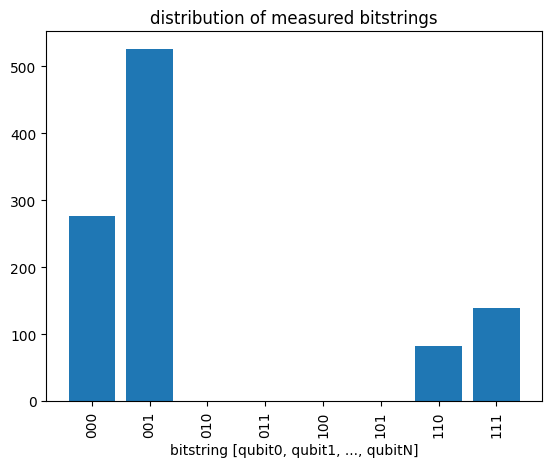

[OrderedDict([('000', 277), ('001', 526), ('010', 0), ('011', 0), ('100', 0), ('101', 0), ('110', 82), ('111', 139)])]


In [10]:
# tq.QuantumDevice
q_dev = tq.QuantumDevice(n_wires=3, record_op=True)
q_dev.x(wires=1)
q_dev.rx(wires=2, params=0.6 * np.pi)
print(q_dev)

q_dev.ry(wires=0, params=0.3 * np.pi)

q_dev.qubitunitary(wires=1, params=[[0, 1j], [-1j, 0]])

q_dev.cnot(wires=[0, 1])

print(q_dev)
bitstring = tq.measure(q_dev, n_shots=1024, draw_id=0)

print(bitstring)

In [15]:
# obtain the qasm string
from torchquantum.plugins import op_history2qasm
print(op_history2qasm(q_dev.n_wires, q_dev.op_history))

OPENQASM 2.0;
include "qelib1.inc";
gate unitary140031100466752 p0 {
	u3(pi,-pi,pi) p0;
}

qreg q[3];
x q[1];
rx(3*pi/5) q[2];
ry(3*pi/10) q[0];
gate unitary140031100466752 p0 {
	u3(pi,-pi,pi) p0;
}
unitary140031100466752 q[1];
cx q[0],q[1];



Batch mode process different states

In [16]:
# batch mode processing

q_dev = tq.QuantumDevice(n_wires=3, bsz=64)
q_dev.x(wires=1)
q_dev.rx(wires=2, params=0.6 * np.pi)
print(q_dev)


 class: QuantumDevice 
 device name: default 
 number of qubits: 3 
 batch size: 64 
 current computing device: cpu 
 recording op history: False 
 current states: [[0.        +0.j       0.        +0.j       0.58778524+0.j
  0.        -0.809017j 0.        +0.j       0.        +0.j
  0.        +0.j       0.        +0.j      ]
 [0.        +0.j       0.        +0.j       0.58778524+0.j
  0.        -0.809017j 0.        +0.j       0.        +0.j
  0.        +0.j       0.        +0.j      ]
 [0.        +0.j       0.        +0.j       0.58778524+0.j
  0.        -0.809017j 0.        +0.j       0.        +0.j
  0.        +0.j       0.        +0.j      ]
 [0.        +0.j       0.        +0.j       0.58778524+0.j
  0.        -0.809017j 0.        +0.j       0.        +0.j
  0.        +0.j       0.        +0.j      ]
 [0.        +0.j       0.        +0.j       0.58778524+0.j
  0.        -0.809017j 0.        +0.j       0.        +0.j
  0.        +0.j       0.        +0.j      ]
 [0.        +0.j     

In [17]:
q_dev = tq.QuantumDevice(n_wires=2)
print(q_dev)
q_dev.set_states(torch.tensor([[0, 0, 1, 0], [0, 1, 0, 0]]).to(torch.complex64))
print(q_dev)

q_dev.x(wires=0)
print(q_dev)

 class: QuantumDevice 
 device name: default 
 number of qubits: 2 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]]
 class: QuantumDevice 
 device name: default 
 number of qubits: 2 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: [[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]
 class: QuantumDevice 
 device name: default 
 number of qubits: 2 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


In [18]:
# demonstrate the GPU processing

n_qubits = 20
bsz = 20
run_iters = 5
use_gpu = True

q_dev = tq.QuantumDevice(n_wires=n_qubits, bsz=bsz)
if use_gpu:
    q_dev.to(torch.device('cuda'))

# start = time.time()

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

start.record()
for k in range(run_iters):
    print(k)
    for qid in range(n_qubits):
        q_dev.rx(qid, params=np.random.rand())
        q_dev.cnot(wires=[qid, (qid+1) % n_qubits])
end.record()

torch.cuda.synchronize()

print(f"Use GPU: {use_gpu}, avg runtime for circuit with {n_qubits} qubits, {2*n_qubits} gates, {bsz} batch size is {start.elapsed_time(end) / run_iters / 1000:.2f} second")



0
1
2
3
4
Use GPU: True, avg runtime for circuit with 20 qubits, 40 gates, 20 batch size is 0.31 second


In [19]:
# automatic gradient computation
q_dev = tq.QuantumDevice(n_wires=2)
q_dev._states.requires_grad = True

q_dev.x(wires=0)
q_dev.rx(wires=1, params=0.6 * np.pi)
print(q_dev)
target_quantum_state = torch.tensor([0, 0, 0, 1], dtype=torch.complex64)
loss = 1 - (q_dev.get_states_1d()[0] @ target_quantum_state).abs()

print(loss)

loss.backward()

print(q_dev._states.grad)


 class: QuantumDevice 
 device name: default 
 number of qubits: 2 
 batch size: 1 
 current computing device: cpu 
 recording op history: False 
 current states: [[0.        +0.j       0.        +0.j       0.58778524+0.j
  0.        -0.809017j]]
tensor(0.1910, grad_fn=<RsubBackward1>)
tensor([[[-0.8090+0.0000j,  0.0000+0.5878j],
         [ 0.0000+0.0000j,  0.0000+0.0000j]]])


In [20]:
# build a circuit

class QModel(tq.QuantumModule):
    def __init__(self):
        super().__init__()
        self.n_wires = 2
        self.u3_0 = tq.U3(has_params=True, trainable=True)
        self.u3_1 = tq.U3(has_params=True, trainable=True)
        self.cu3_0 = tq.CU3(has_params=True, trainable=True)
        self.cu3_1 = tq.CU3(has_params=True, trainable=True)
        self.u3_2 = tq.U3(has_params=True, trainable=True)
        self.u3_3 = tq.U3(has_params=True, trainable=True)
        self.random_layer = tq.RandomLayer(n_ops=10,
                                           wires=list(range(self.n_wires)))

    def forward(self, q_device: tq.QuantumDevice):
        self.u3_0(q_device, wires=0)
        self.u3_1(q_device, wires=1)
        self.cu3_0(q_device, wires=[0, 1])
        self.u3_2(q_device, wires=0)
        self.u3_3(q_device, wires=1)
        self.cu3_1(q_device, wires=[1, 0])
        self.random_layer(q_device)


q_dev = tq.QuantumDevice(n_wires=2, bsz=3)
print(q_dev)

model = QModel()
model(q_dev)
print(q_dev)

 class: QuantumDevice 
 device name: default 
 number of qubits: 2 
 batch size: 3 
 current computing device: cpu 
 recording op history: False 
 current states: [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]
 class: QuantumDevice 
 device name: default 
 number of qubits: 2 
 batch size: 3 
 current computing device: cpu 
 recording op history: False 
 current states: [[-0.0859167 -0.00890284j -0.08810918-0.3398175j   0.28930724-0.00100794j
   0.50331026-0.7295748j ]
 [-0.0859167 -0.00890284j -0.08810918-0.3398175j   0.28930724-0.00100794j
   0.50331026-0.7295748j ]
 [-0.0859167 -0.00890284j -0.08810918-0.3398175j   0.28930724-0.00100794j
   0.50331026-0.7295748j ]]


In [21]:
# Apply gates to qdev with tq.QuantumModule
q_dev = tq.QuantumDevice(n_wires=2, bsz=3)
ops = [
    {'name': 'hadamard', 'wires': 0}, 
    {'name': 'cnot', 'wires': [0, 1]},
    {'name': 'rx', 'wires': 0, 'params': 0.5, 'trainable': True},
    {'name': 'u3', 'wires': 0, 'params': [0.1, 0.2, 0.3], 'trainable': True},
    {'name': 'h', 'wires': 1, 'inverse': True}
]

qmodule = tq.QuantumModule.from_op_history(ops)
qmodule(q_dev)
print(q_dev)

 class: QuantumDevice 
 device name: default 
 number of qubits: 2 
 batch size: 3 
 current computing device: cpu 
 recording op history: False 
 current states: [[ 0.4588924 -0.12479635j  0.50515497+0.13660912j  0.50880915+0.12229842j
  -0.34288543-0.32952383j]
 [ 0.4588924 -0.12479635j  0.50515497+0.13660912j  0.50880915+0.12229842j
  -0.34288543-0.32952383j]
 [ 0.4588924 -0.12479635j  0.50515497+0.13660912j  0.50880915+0.12229842j
  -0.34288543-0.32952383j]]


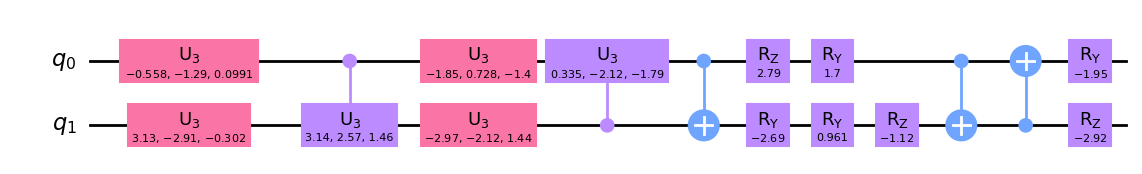

In [22]:
# easy conversion to qiskit
from torchquantum.plugins.qiskit_plugin import tq2qiskit

circ = tq2qiskit(q_dev, model)
circ.draw('mpl')

In [19]:
! pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.1 MB/s eta 0:00:00
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 31.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 14.5 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492036 sha256=a5ae30021012cd8e7bd52791502582695304fcf6882922dd08b4ea7dd9b50b74
  Stored in directory: /NFS/archive/home/hanrui/.cache/pip/wheels/a0/0b/ee/e6994fadb42c1354dcccb139b0bf2795271bddfe6253ccdf11
Successfully built future


In [23]:
# Speed comparison with pennylane

import pennylane as qml
from pennylane import numpy as np
import random
import time 


In [24]:
n_wires = 10
bsz = 32
use_gpu=False

In [25]:
dev=qml.device("default.qubit",wires=n_wires)

@qml.qnode(dev,interface="torch")
def pennylane_circ(params):
    qml.Rot(params[0],params[1],params[2],wires=0)
    qml.Rot(params[3],params[4],params[5],wires=1)
    qml.ctrl(qml.Rot,control=0)(params[6],params[7],params[8],wires=1)
    qml.Rot(params[9],params[10],params[11],wires=0)
    qml.Rot(params[12],params[13],params[14],wires=1)  
    qml.ctrl(qml.Rot,control=1)(params[15],params[16],params[17],wires=0)
    return qml.state()

if use_gpu:
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

params=np.zeros(18)

reps = 20
start = time.time()
for _ in range(reps):
  for k in range(bsz):
    pennylane_circ(params)

end = time.time()
pennylane_time = (end-start)/reps
print(f"Pennylane inference time: {pennylane_time}")


Pennylane inference time: 0.32524551153182985


In [26]:
reps = 1000
'''
Circuit definition in torchquantum
'''
class QModel(tq.QuantumModule):
    def __init__(self, bsz, n_wires):
        super().__init__()
        self.bsz = bsz
        self.n_wires = n_wires
        self.u3_0 = tq.U3(has_params=True, trainable=True)
        self.u3_1 = tq.U3(has_params=True, trainable=True)
        self.cu3_0 = tq.CU3(has_params=True, trainable=True)
        self.cu3_1 = tq.CU3(has_params=True, trainable=True)
        self.u3_2 = tq.U3(has_params=True, trainable=True)
        self.u3_3 = tq.U3(has_params=True, trainable=True)
        
    def forward(self, q_device: tq.QuantumDevice):
        q_device.reset_states(self.bsz)
        self.u3_0(q_device, wires=0)
        self.u3_1(q_device, wires=1)
        self.cu3_0(q_device, wires=[0, 1])
        self.u3_2(q_device, wires=0)
        self.u3_3(q_device, wires=1)
        self.cu3_1(q_device, wires=[1, 0])

tq_circ = QModel(n_wires=n_wires, bsz=bsz).to(device)
q_device = tq.QuantumDevice(n_wires=n_wires)


start = time.time()
for _ in range(reps):
  tq_circ(q_device)

end = time.time()
tq_time = (end-start)/reps

print(f"TorchQuantum inference time {tq_time}; is {pennylane_time/tq_time} X faster")

TorchQuantum inference time 0.006258550405502319; is 51.96818599493651 X faster


## 1.3 TorchQuantum for state preparation circuit

In [27]:
import torch
import torch.optim as optim
import argparse

import torchquantum as tq
from torch.optim.lr_scheduler import CosineAnnealingLR

import random
import numpy as np

In [28]:

class QModel(tq.QuantumModule):
    def __init__(self):
        super().__init__()
        self.n_wires = 2
        self.u3_0 = tq.U3(has_params=True, trainable=True)
        self.u3_1 = tq.U3(has_params=True, trainable=True)
        self.cu3_0 = tq.CU3(has_params=True, trainable=True)
        self.cu3_1 = tq.CU3(has_params=True, trainable=True)
        self.u3_2 = tq.U3(has_params=True, trainable=True)
        self.u3_3 = tq.U3(has_params=True, trainable=True)

    def forward(self, q_state: tq.QuantumDevice):
        q_state.reset_states(1)
        self.u3_0(q_state, wires=0)
        self.u3_1(q_state, wires=1)
        self.cu3_0(q_state, wires=[0, 1])
        self.u3_2(q_state, wires=0)
        self.u3_3(q_state, wires=1)
        self.cu3_1(q_state, wires=[1, 0])

def train(target_state, state, model, optimizer):
    model(state)
    result_state = state.get_states_1d()[0]

    # compute the state infidelity
    loss = 1 - torch.dot(result_state, target_state).abs() ** 2

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"infidelity (loss): {loss.item()}, \n target state : "
          f"{target_state.detach().cpu().numpy()}, \n "
          f"result state : {result_state.detach().cpu().numpy()}\n")

In [29]:
def main(n_epochs=3000):
    seed = 42
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    model = QModel().to(device)

    optimizer = optim.Adam(model.parameters(), lr=1e-2, weight_decay=0)
    scheduler = CosineAnnealingLR(optimizer, T_max=n_epochs)

    q_device = tq.QuantumDevice(n_wires=2)
    target_state = torch.tensor([0, 1, 0, 0], dtype=torch.complex64)

    for epoch in range(1, n_epochs + 1):
        print(f"Epoch {epoch}, LR: {optimizer.param_groups[0]['lr']}")
        train(target_state, q_device, model, optimizer)
        scheduler.step()

In [30]:
main(n_epochs=3000)

Epoch 1, LR: 0.01
infidelity (loss): 0.9505876898765564, 
 target state : [0.+0.j 1.+0.j 0.+0.j 0.+0.j], 
 result state : [-0.38081774-0.00160372j -0.08851498+0.20390543j  0.27950755+0.10645153j
  0.19007619+0.8246077j ]

Epoch 2, LR: 0.009999997258443473
infidelity (loss): 0.9399973154067993, 
 target state : [0.+0.j 1.+0.j 0.+0.j 0.+0.j], 
 result state : [-0.37776235-0.01029789j -0.10236481+0.22254013j  0.2810367 +0.10536386j
  0.1761803 +0.82223135j]

Epoch 3, LR: 0.009999989033776897
infidelity (loss): 0.9284378290176392, 
 target state : [0.+0.j 1.+0.j 0.+0.j 0.+0.j], 
 result state : [-0.37454095-0.01894525j -0.11619259+0.24095953j  0.28263515+0.10402666j
  0.16064826+0.81932056j]

Epoch 4, LR: 0.009999975326009292
infidelity (loss): 0.9159607291221619, 
 target state : [0.+0.j 1.+0.j 0.+0.j 0.+0.j], 
 result state : [-0.37116215-0.0275421j  -0.12923913+0.25949275j  0.28429654+0.10243264j
  0.14610922+0.8153379j ]

Epoch 5, LR: 0.009999956135155688
infidelity (loss): 0.902623951

KeyboardInterrupt: 

## 1.4 TorchQuantum for VQE circuit 

In [37]:
! wget https://www.dropbox.com/s/1rtttfxoo02s09e/h2_new.txt

--2023-06-17 16:53:16--  https://www.dropbox.com/s/1rtttfxoo02s09e/h2_new.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/1rtttfxoo02s09e/h2_new.txt [following]
--2023-06-17 16:53:17--  https://www.dropbox.com/s/raw/1rtttfxoo02s09e/h2_new.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4311d3b3b86808504cbf9859d4.dl.dropboxusercontent.com/cd/0/inline/B-I2ix3CYdWMyIXeV91Bhy2aplKwKdy5RLzC1aPGZJq5SeH6ni-jH3vcHIK3dhyFCDG_EB6f5XMJFnYSe0Y8zDoE4ayJOuUMufZhYlP7DyfpxiOVXmyCrn4p64nkHIaYMSVfLWlE86XSezHXomh2Ate23yh_DnhJ6u4MG9I7UQ7I3g/file# [following]
--2023-06-17 16:53:17--  https://uc4311d3b3b86808504cbf9859d4.dl.dropboxusercontent.com/cd/0/inline/B-I2ix3CYdWMyIXeV91Bhy2aplKwKdy5RLzC1aPGZJq5SeH6ni-jH3vcHIK3dhyFCDG_EB6f5XMJFnYSe0Y8zD

In [31]:
import torchquantum as tq
import torch
from torchquantum.vqe_utils import parse_hamiltonian_file
import random
import numpy as np
import argparse
import torch.optim as optim

from torch.optim.lr_scheduler import CosineAnnealingLR
from torchquantum.measure import expval_joint_analytical



In [32]:
class QVQEModel(tq.QuantumModule):
    def __init__(self, arch, hamil_info):
        super().__init__()
        self.arch = arch
        self.hamil_info = hamil_info
        self.n_wires = hamil_info["n_wires"]
        self.n_blocks = arch["n_blocks"]
        self.u3_layers = tq.QuantumModuleList()
        self.cu3_layers = tq.QuantumModuleList()
        for _ in range(self.n_blocks):
            self.u3_layers.append(
                tq.Op1QAllLayer(
                    op=tq.U3,
                    n_wires=self.n_wires,
                    has_params=True,
                    trainable=True,
                )
            )
            self.cu3_layers.append(
                tq.Op2QAllLayer(
                    op=tq.CU3,
                    n_wires=self.n_wires,
                    has_params=True,
                    trainable=True,
                    circular=True,
                )
            )

    def forward(self):
        qdev = tq.QuantumDevice(
            n_wires=self.n_wires, bsz=1, device=next(self.parameters()).device
        )

        for k in range(self.n_blocks):
            self.u3_layers[k](qdev)
            self.cu3_layers[k](qdev)

        expval = 0
        for hamil in self.hamil_info["hamil_list"]:
            expval += (
                expval_joint_analytical(qdev, observable=hamil["pauli_string"])
                * hamil["coeff"]
            )

        return expval


def train(model, optimizer, n_steps=1):
    for _ in range(n_steps):
        loss = model()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f"Expectation of energy: {loss.item()}")


def valid_test(model):
    with torch.no_grad():
        loss = model()

    print(f"validation: expectation of energy: {loss.item()}")

def process_hamil_info(hamil_info):
    hamil_list = hamil_info["hamil_list"]
    n_wires = hamil_info["n_wires"]
    all_info = []

    for hamil in hamil_list:
        pauli_string = ""
        for i in range(n_wires):
            if i in hamil["wires"]:
                wire = hamil["wires"].index(i)
                pauli_string += hamil["observables"][wire].upper()
            else:
                pauli_string += "I"
        all_info.append({"pauli_string": pauli_string, "coeff": hamil["coefficient"]})
    hamil_info["hamil_list"] = all_info
    return hamil_info



In [33]:
from torchquantum.vqe_utils import parse_hamiltonian_file

class Args(object):
  def __init__(self):
    pass

def main():
    args = Args()
    args.n_blocks = 2
    args.steps_per_epoch=100
    args.epochs=100
    # args.hamil_filename = '/content/torchquantum/h2_new.txt'
    args.hamil_filename = 'h2_new.txt'

    # if args.pdb:
    #     import pdb
    #     pdb.set_trace()

    seed = 0
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    hamil_info = process_hamil_info(parse_hamiltonian_file(args.hamil_filename))

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    model = QVQEModel(arch={"n_blocks": args.n_blocks}, hamil_info=hamil_info)

    model.to(device)

    n_epochs = args.epochs
    optimizer = optim.Adam(model.parameters(), lr=5e-3, weight_decay=1e-4)
    scheduler = CosineAnnealingLR(optimizer, T_max=n_epochs)

    for epoch in range(1, n_epochs + 1):
        # train
        print(f"Epoch {epoch}, LR: {optimizer.param_groups[0]['lr']}")
        train(model, optimizer, n_steps=args.steps_per_epoch)

        scheduler.step()

    # final valid
    valid_test(model)

In [34]:
main()

Epoch 1, LR: 0.005
Expectation of energy: -0.33776021003723145
Expectation of energy: -0.3474752902984619
Expectation of energy: -0.35758811235427856
Expectation of energy: -0.36809876561164856
Expectation of energy: -0.37900713086128235
Expectation of energy: -0.39031362533569336
Expectation of energy: -0.4020189046859741
Expectation of energy: -0.41412225365638733
Expectation of energy: -0.42662233114242554
Expectation of energy: -0.43951675295829773
Expectation of energy: -0.45280158519744873
Expectation of energy: -0.46647223830223083
Expectation of energy: -0.4805237054824829
Expectation of energy: -0.4949498772621155
Expectation of energy: -0.5097430944442749
Expectation of energy: -0.5248957872390747
Expectation of energy: -0.5403981804847717
Expectation of energy: -0.556240975856781
Expectation of energy: -0.5724124908447266
Expectation of energy: -0.5889019966125488
Expectation of energy: -0.6056978106498718
Expectation of energy: -0.6227884888648987
Expectation of energy: -0.

KeyboardInterrupt: 

## 1.5 TorchQuantum for QNN circuit

In [35]:
import torch
import torch.nn.functional as F
import torch.optim as optim
import argparse
import random
import numpy as np

import torchquantum as tq
from torchquantum.plugins import (
    tq2qiskit_measurement,
    qiskit_assemble_circs,
    op_history2qiskit,
    op_history2qiskit_expand_params,
)

from torchquantum.datasets import MNIST
from torch.optim.lr_scheduler import CosineAnnealingLR


In [36]:
class QFCModel(tq.QuantumModule):
    class QLayer(tq.QuantumModule):
        def __init__(self):
            super().__init__()
            self.n_wires = 4
            self.random_layer = tq.RandomLayer(
                n_ops=50, wires=list(range(self.n_wires))
            )

            # gates with trainable parameters
            self.rx0 = tq.RX(has_params=True, trainable=True)
            self.ry0 = tq.RY(has_params=True, trainable=True)
            self.rz0 = tq.RZ(has_params=True, trainable=True)
            self.crx0 = tq.CRX(has_params=True, trainable=True)

        def forward(self, qdev: tq.QuantumDevice):
            self.random_layer(qdev)

            # some trainable gates (instantiated ahead of time)
            self.rx0(qdev, wires=0)
            self.ry0(qdev, wires=1)
            self.rz0(qdev, wires=3)
            self.crx0(qdev, wires=[0, 2])

            # add some more non-parameterized gates (add on-the-fly)
            qdev.h(wires=3)  # type: ignore
            qdev.sx(wires=2)  # type: ignore
            qdev.cnot(wires=[3, 0])  # type: ignore
            qdev.rx(
                wires=1,
                params=torch.tensor([0.1]),
                static=self.static_mode,
                parent_graph=self.graph,
            )  # type: ignore

    def __init__(self):
        super().__init__()
        self.n_wires = 4
        self.encoder = tq.GeneralEncoder(tq.encoder_op_list_name_dict["4x4_u3rx"])

        self.q_layer = self.QLayer()
        self.measure = tq.MeasureAll(tq.PauliZ)

    def forward(self, x, use_qiskit=False):
        qdev = tq.QuantumDevice(
            n_wires=self.n_wires, bsz=x.shape[0], device=x.device, record_op=True
        )

        bsz = x.shape[0]
        x = F.avg_pool2d(x, 6).view(bsz, 16)
        devi = x.device

        if use_qiskit:
            # use qiskit to process the circuit
            # create the qiskit circuit for encoder
            self.encoder(qdev, x)  
            op_history_parameterized = qdev.op_history
            qdev.reset_op_history()
            encoder_circs = op_history2qiskit_expand_params(self.n_wires, op_history_parameterized, bsz=bsz)

            # create the qiskit circuit for trainable quantum layers
            self.q_layer(qdev)
            op_history_fixed = qdev.op_history
            qdev.reset_op_history()
            q_layer_circ = op_history2qiskit(self.n_wires, op_history_fixed)

            # create the qiskit circuit for measurement
            measurement_circ = tq2qiskit_measurement(qdev, self.measure)

            # assemble the encoder, trainable quantum layers, and measurement circuits
            assembled_circs = qiskit_assemble_circs(
                encoder_circs, q_layer_circ, measurement_circ
            )

            # call the qiskit processor to process the circuit
            x0 = self.qiskit_processor.process_ready_circs(qdev, assembled_circs).to(  # type: ignore
                devi
            )
            x = x0

        else:
            # use torchquantum to process the circuit
            self.encoder(qdev, x)
            qdev.reset_op_history()
            self.q_layer(qdev)
            x = self.measure(qdev)

        x = x.reshape(bsz, 2, 2).sum(-1).squeeze()
        x = F.log_softmax(x, dim=1)

        return x


def train(dataflow, model, device, optimizer):
    for feed_dict in dataflow["train"]:
        inputs = feed_dict["image"].to(device)
        targets = feed_dict["digit"].to(device)

        outputs = model(inputs)
        loss = F.nll_loss(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f"loss: {loss.item()}", end="\r")


def valid_test(dataflow, split, model, device, qiskit=False):
    target_all = []
    output_all = []
    with torch.no_grad():
        for feed_dict in dataflow[split]:
            inputs = feed_dict["image"].to(device)
            targets = feed_dict["digit"].to(device)

            outputs = model(inputs, use_qiskit=qiskit)

            target_all.append(targets)
            output_all.append(outputs)
        target_all = torch.cat(target_all, dim=0)
        output_all = torch.cat(output_all, dim=0)

    _, indices = output_all.topk(1, dim=1)
    masks = indices.eq(target_all.view(-1, 1).expand_as(indices))
    size = target_all.shape[0]
    corrects = masks.sum().item()
    accuracy = corrects / size
    loss = F.nll_loss(output_all, target_all).item()

    print(f"{split} set accuracy: {accuracy}")
    print(f"{split} set loss: {loss}")


In [37]:
def main():
    n_epochs = 3
    seed = 0
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    dataset = MNIST(
        root="./mnist_data",
        train_valid_split_ratio=[0.9, 0.1],
        digits_of_interest=[3, 6],
        n_test_samples=75,
    )
    dataflow = dict()

    for split in dataset:
        sampler = torch.utils.data.RandomSampler(dataset[split])
        dataflow[split] = torch.utils.data.DataLoader(
            dataset[split],
            batch_size=256,
            sampler=sampler,
            num_workers=8,
            pin_memory=True,
        )

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    model = QFCModel().to(device)

    optimizer = optim.Adam(model.parameters(), lr=5e-3, weight_decay=1e-4)
    scheduler = CosineAnnealingLR(optimizer, T_max=n_epochs)

    for epoch in range(1, n_epochs + 1):
        # train
        print(f"Epoch {epoch}:")
        train(dataflow, model, device, optimizer)
        print(optimizer.param_groups[0]["lr"])

        # valid
        valid_test(dataflow, "valid", model, device)
        scheduler.step()

    # test
    valid_test(dataflow, "test", model, device, qiskit=False)

    # run on Qiskit simulator and real Quantum Computers
    try:
        from qiskit import IBMQ
        from torchquantum.plugins import QiskitProcessor

        # firstly perform simulate
        print(f"\nTest with Qiskit Simulator")
        processor_simulation = QiskitProcessor(use_real_qc=False)
        model.set_qiskit_processor(processor_simulation)
        valid_test(dataflow, "test", model, device, qiskit=True)

        # then try to run on REAL QC
        backend_name = "ibmq_lima"
        print(f"\nTest on Real Quantum Computer {backend_name}")
        # Please specify your own hub group and project if you have the
        # IBMQ premium plan to access more machines.
        processor_real_qc = QiskitProcessor(
            use_real_qc=True,
            backend_name=backend_name,
            hub="ibm-q",
            group="open",
            project="main",
        )
        model.set_qiskit_processor(processor_real_qc)
        valid_test(dataflow, "test", model, device, qiskit=True)
    except ImportError:
        print(
            "Please install qiskit, create an IBM Q Experience Account and "
            "save the account token according to the instruction at "
            "'https://github.com/Qiskit/qiskit-ibmq-provider', "
            "then try again."
        )

In [38]:
main()

[2023-06-18 11:18:07.672] Only use the front 75 images as TEST set.


Epoch 1:
0.005 0.5862550139427185
valid set accuracy: 0.8157676348547718
valid set loss: 0.5728925466537476
Epoch 2:
0.00375.5556533932685852
valid set accuracy: 0.8190871369294606
valid set loss: 0.5411778688430786
Epoch 3:


KeyboardInterrupt: 